In [1]:
from cartpole import *
import pytorch_utils as ptu
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)

In [2]:
ptu.init_gpu(use_gpu=False)  # use cpu

env = gym.make("CartPole-v1")
env.seed(42)

ptu.set_random_seed(42)

obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.n

policy = ptu.MLPCategoricalpolicy(
    obs_dim, act_dim, hidden_sizes=[64, 64], activation="relu_inplace"
).to(ptu.device)


GPU not detected. Defaulting to CPU.


In [3]:
lr = 3e-3

# 1
## 1. REINFORCE
Implement a vanilla reinforce algorithm given by the following gradient update for your
policy.

In [4]:
mean_reward_reinforce, train_loss_reinforce = reinforce(
    env,
    policy,
    num_itrs=200,
    batch_size=500,
    gamma=0.99,
    lr=lr)




100%|██████████| 200/200 [00:39<00:00,  5.09it/s]


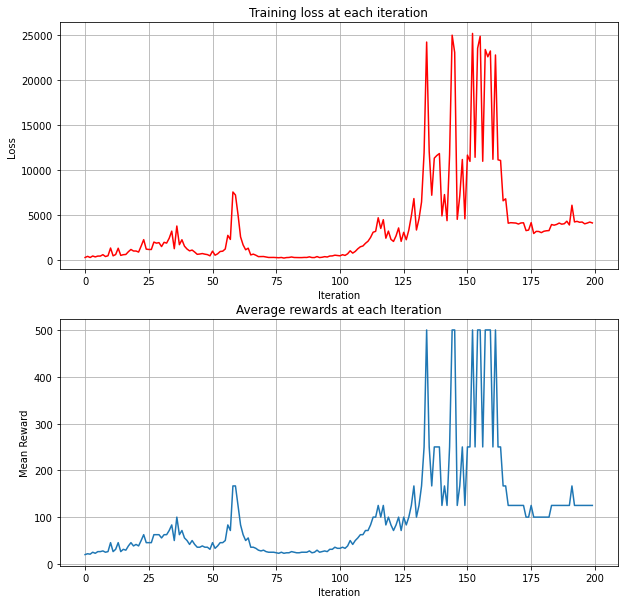

In [5]:
plot_loss_rew(train_loss_reinforce, mean_reward_reinforce)

## 1.2 Reward to go
Implement the policy gradient algorithm using update rule

100%|██████████| 200/200 [00:41<00:00,  4.83it/s]


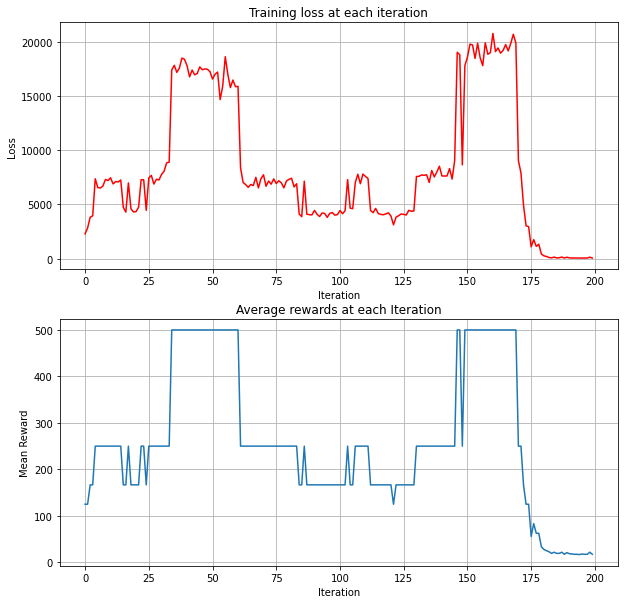

In [6]:
mean_reward_rtg, train_loss_rtg = vpg_with_baseline(
    env,
    policy,
    num_itrs=200,
    batch_size=500,
    gamma=0.99,
    lr=lr,
    baseline=False,
)
plot_loss_rew(train_loss_rtg, mean_reward_rtg)




## 1.3 Reward to go + baseline
To reduce the variance of the estimated returns, subtract the returns using a constant
b such that the mean of the modified returns is 0. 


100%|██████████| 200/200 [00:39<00:00,  5.10it/s]


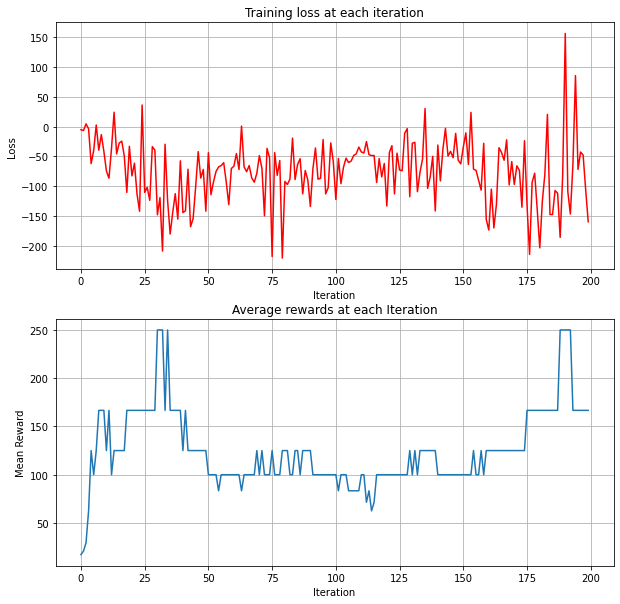

In [7]:
mean_reward_baseline, train_loss_baseline = vpg_with_baseline(
    env,
    policy,
    num_itrs=200,
    batch_size=500,
    gamma=0.99,
    lr=lr,
    baseline=True,
)
plot_loss_rew(train_loss_baseline, mean_reward_baseline)

Although the final result collapse as well and it don't seems to be be than previous plots. The variance is smaller than reinforce and reward to go version. Each model should be tune with the associate hyperparemeters. In order to fairly compare amoung 3 methods, I use same network size and depth and same learning rate. 

With an good learning rate for baseline case, the result should be the best amoung 3 methodes.

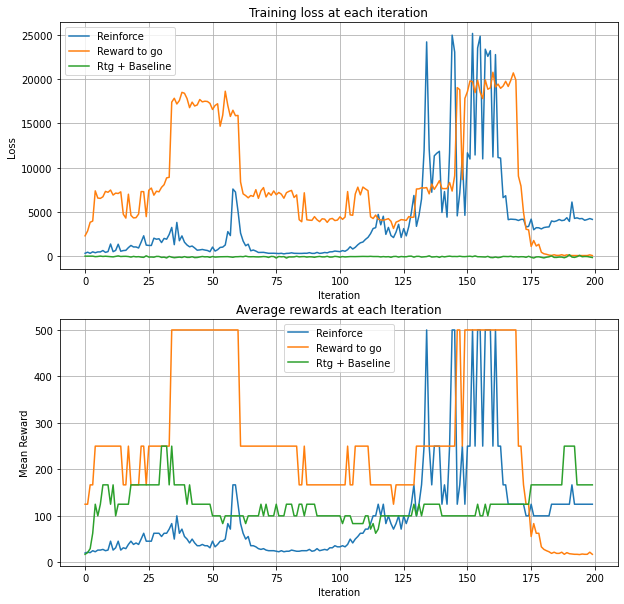

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(train_loss_reinforce, label= "Reinforce")
ax1.plot(train_loss_rtg, label="Reward to go")
ax1.plot(train_loss_baseline, label="Rtg + Baseline")

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.set_title('Training loss at each iteration')
ax1.grid(True)
ax1.legend()


ax2.plot(mean_reward_reinforce, label= "Reinforce")
ax2.plot(mean_reward_rtg, label="Reward to go")
ax2.plot(mean_reward_baseline, label="Rtg + Baseline")


ax2.set_xlabel('Iteration')
ax2.set_ylabel('Mean Reward')
ax2.set_title('Average rewards at each Iteration')
ax2.grid(True)
ax2.legend()
plt.show()

In [16]:
# ===============================================================
# 600
lr = 7e-3
mean_reward_baseline_600, train_loss_baseline_600 = vpg_with_baseline(
    env,
    policy,
    num_itrs=200,
    batch_size=600,
    gamma=0.99,
    lr=lr,
    baseline=False,
)

mean_reward_baseline_800, train_loss_baseline_800 = vpg_with_baseline(
    env,
    policy,
    num_itrs=200,
    batch_size=800,
    gamma=0.99,
    lr=lr,
    baseline=False,
)

mean_reward_baseline_1000, train_loss_baseline_1000 = vpg_with_baseline(
    env,
    policy,
    num_itrs=200,
    batch_size=1000,
    gamma=0.99,
    lr=lr,
    baseline=False,
)

100%|██████████| 200/200 [01:23<00:00,  2.39it/s]


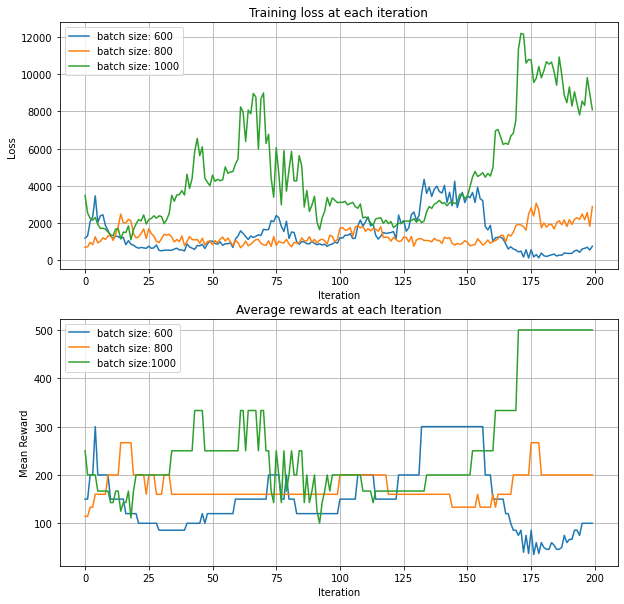

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(train_loss_baseline_600, label= "batch size: 600")
ax1.plot(train_loss_baseline_800, label="batch size: 800")
ax1.plot(train_loss_baseline_1000, label="batch size: 1000")

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.set_title('Training loss at each iteration')
ax1.grid(True)
ax1.legend()


ax2.plot(mean_reward_baseline_600, label= "batch size: 600")
ax2.plot(mean_reward_baseline_800, label="batch size: 800")
ax2.plot(mean_reward_baseline_1000, label="batch size:1000")


ax2.set_xlabel('Iteration')
ax2.set_ylabel('Mean Reward')
ax2.set_title('Average rewards at each Iteration')
ax2.grid(True)
ax2.legend()
plt.show()

Since we are using MC estimation, increasing batch size did improve the training perframnce.  